In [49]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import numpy as np
from sklearn import metrics

## 1. Load and visualize the data

In [29]:
path = pathlib.Path('../data/lab2.csv')

In [30]:
df = pd.read_csv(path.absolute())
df.columns

Index(['a1', 'a2', 'class'], dtype='object')

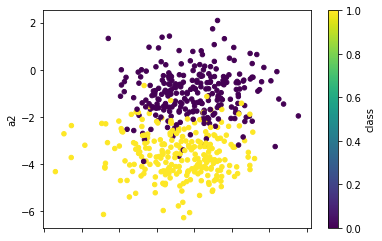

In [31]:
df.plot.scatter(x = 'a1', y = 'a2', c='class', colormap = 'viridis')

## 2. prepare the data

In [32]:
x = df[['a1','a2']]
y = df['class']

In [33]:
x.head()

,a1,a2
0,-3.021065,-3.167397
1,-3.857654,-3.920570
2,-4.501169,-2.686552
3,-3.973198,-0.817386
4,-3.527329,-3.338574


In [34]:
y

0      1
1      1
2      1
3      0
4      1
      ..
495    1
496    1
497    0
498    1
499    1
Name: class, Length: 500, dtype: int64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
len(x_train)

400

In [37]:
len(y_train)

400

In [38]:
len(x_test)

100

## 3. Train a classifier and classify the test records

#### 3.1 Train the model with training data

In [45]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 3.2 Determine the accuracy score using the training data

In [46]:
clf.score(x_train, y_train)

0.9125

#### 3.3 Classify the test records using the trained clssifier

In [47]:
y_predict = clf.predict(x_test)

recall is a measure of your model's completeness. Of all the points labeled 1, only 86% of the results returned were truly relevant. Of the entire dataset, 88% of the results were truly relevant.

In [53]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.90      0.86      0.88        51

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



#### 3.4 plot the predictions and trues side by side

In [65]:
len(y_predict)

100